In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path= ('/content/drive/MyDrive/Datasets/laptopData.csv')
dataset = pd.read_csv(file_path)
dataset.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
dataset.info

<bound method DataFrame.info of       Unnamed: 0 Company            TypeName Inches  \
0            0.0   Apple           Ultrabook   13.3   
1            1.0   Apple           Ultrabook   13.3   
2            2.0      HP            Notebook   15.6   
3            3.0   Apple           Ultrabook   15.4   
4            4.0   Apple           Ultrabook   13.3   
...          ...     ...                 ...    ...   
1298      1298.0  Lenovo  2 in 1 Convertible     14   
1299      1299.0  Lenovo  2 in 1 Convertible   13.3   
1300      1300.0  Lenovo            Notebook     14   
1301      1301.0      HP            Notebook   15.6   
1302      1302.0    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 12 columns]>

In [ ]:
dataset.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [ ]:
dataset.dtypes

,0
Unnamed: 0,float64
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object
OpSys,object


In [ ]:
dataset.shape

(1303, 12)

In [ ]:
# if we want shape of both rows and columns separately
dataset.shape[0]

1303

In [ ]:
dataset.shape[1]

12

In [ ]:
dataset.isnull().sum()

,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30


In [ ]:
# fill numerical values with mean
means = dataset.select_dtypes(include=np.number).mean()
dataset.fillna(means, inplace=True)
# fill categorical values with mode
mode = dataset.select_dtypes(exclude=np.number).mode()
modes = mode.iloc[0]
dataset[mode.columns] = dataset[mode.columns].fillna(modes)
dataset.isnull().sum()


,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
dataset_new = dataset.drop(columns = 'Unnamed: 0',inplace = False)
dataset_new.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
dataset.shape

(1303, 12)

In [ ]:
duplicate_samples = dataset[dataset.duplicated(keep=False)]
duplicate_samples

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,652.674784,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,59955.814073
46,652.674784,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,59955.814073
50,652.674784,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,59955.814073
115,652.674784,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,59955.814073
125,652.674784,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,59955.814073
148,652.674784,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,59955.814073
190,652.674784,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,59955.814073
209,652.674784,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,59955.814073
267,652.674784,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,59955.814073
336,652.674784,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,59955.814073


In [ ]:
dataset.rename(columns={
    'Company': 'Laptop Brand',
    'TypeName': 'Model',
    'Inches': 'Screen Size',
    'ScreenResolution': 'Screen Resolution',
    'Cpu': 'CPU Details',
    'Ram': 'RAM Size (GB)',
    'Memory': 'Storage Details',
    'Gpu': 'GPU Details',
    'OpSys': 'Operating System',
    'Weight': 'Weight (kg)',
    'Price': 'Price (USD)'
}, inplace=True)

dataset.head()


,Unnamed: 0,Laptop Brand,Brand,Screen Size,Screen Resolution,CPU Details,RAM Size (GB),Storage Details,GPU Details,Operating System,Weight (kg),Price (USD)
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
cat_count = ["Laptop Brand", "Brand","Screen Size","Screen Resolution","CPU Details", "RAM Size (GB)","Storage Details","GPU Details", "Operating System", "Weight (kg)", "Price (USD)"]
for col in cat_count:
    print(dataset[col].value_counts())
    print("-"*50)

Laptop Brand
Lenovo       320
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64
--------------------------------------------------
Brand
Notebook              740
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64
--------------------------------------------------
Screen Size
15.6    670
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64
----------

<Axes: ylabel='Laptop Brand'>

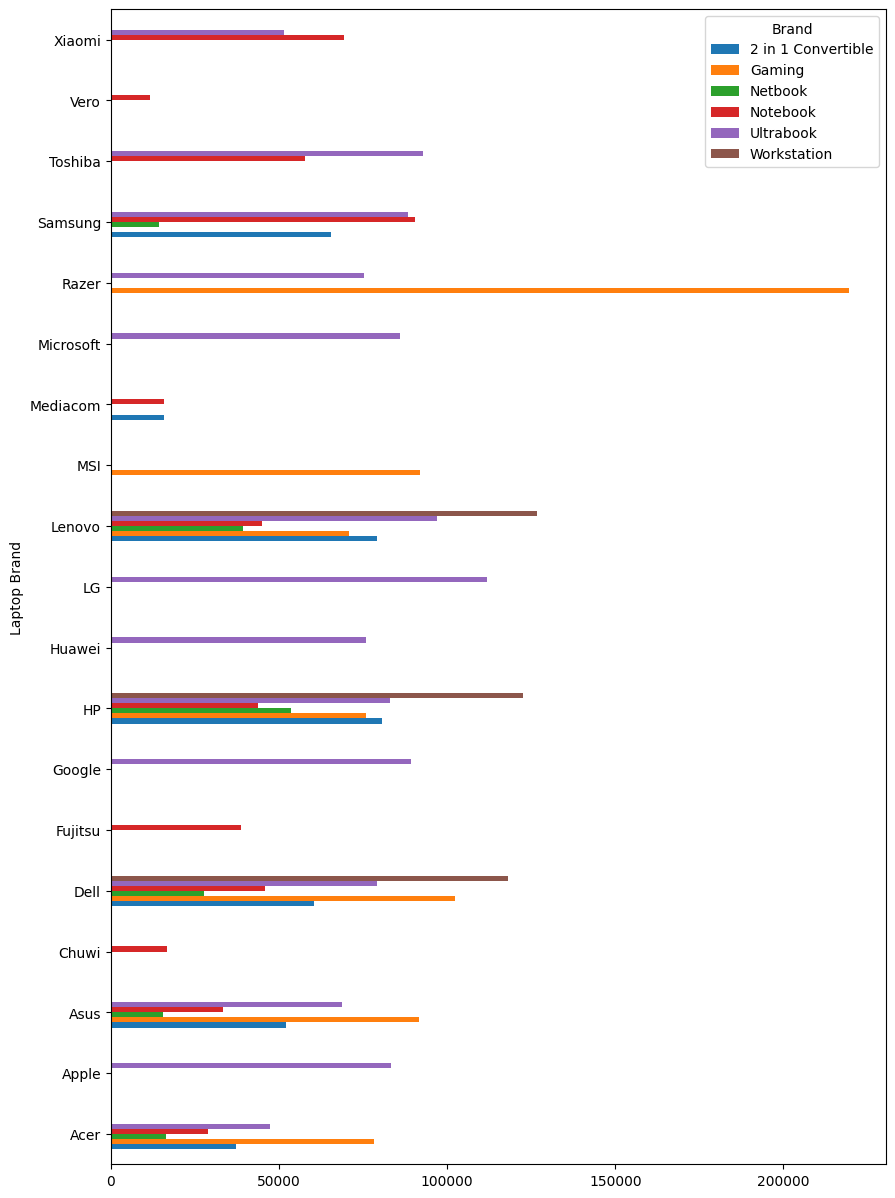

In [ ]:
dataset.pivot_table(index = "Laptop Brand", columns = "Brand", values = "Price (USD)", aggfunc = "mean").plot.barh(figsize = (10, 15))

<ipython-input-48-66dfdd0dad59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Operating System', data=dataset, palette='viridis')


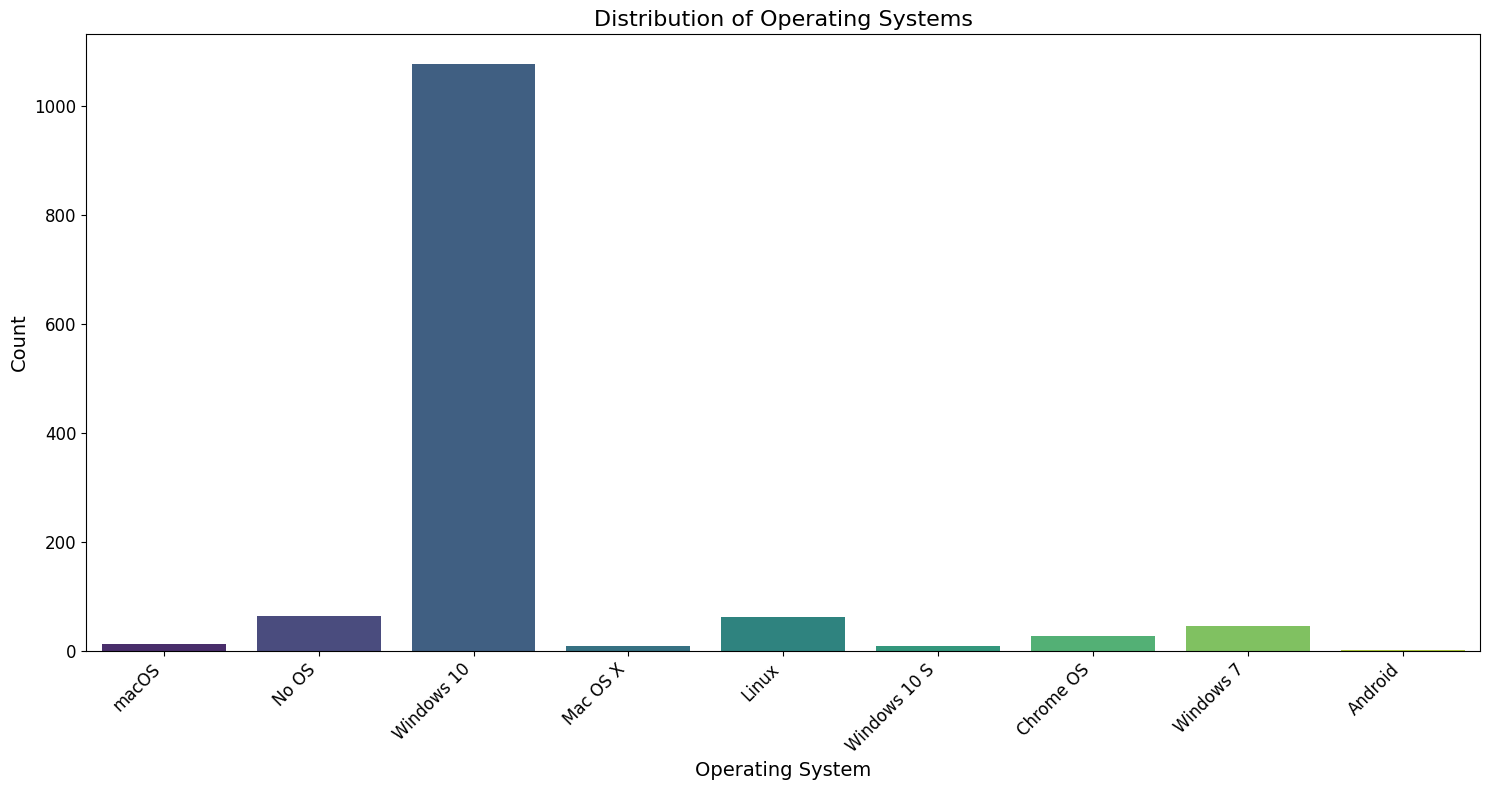

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Operating System', data=dataset, palette='viridis')
plt.title('Distribution of Operating Systems', fontsize=16)
plt.xlabel('Operating System', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-56-01bb04940394>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RAM Size (GB)', y='Price (USD)', data=dataset, palette='viridis')


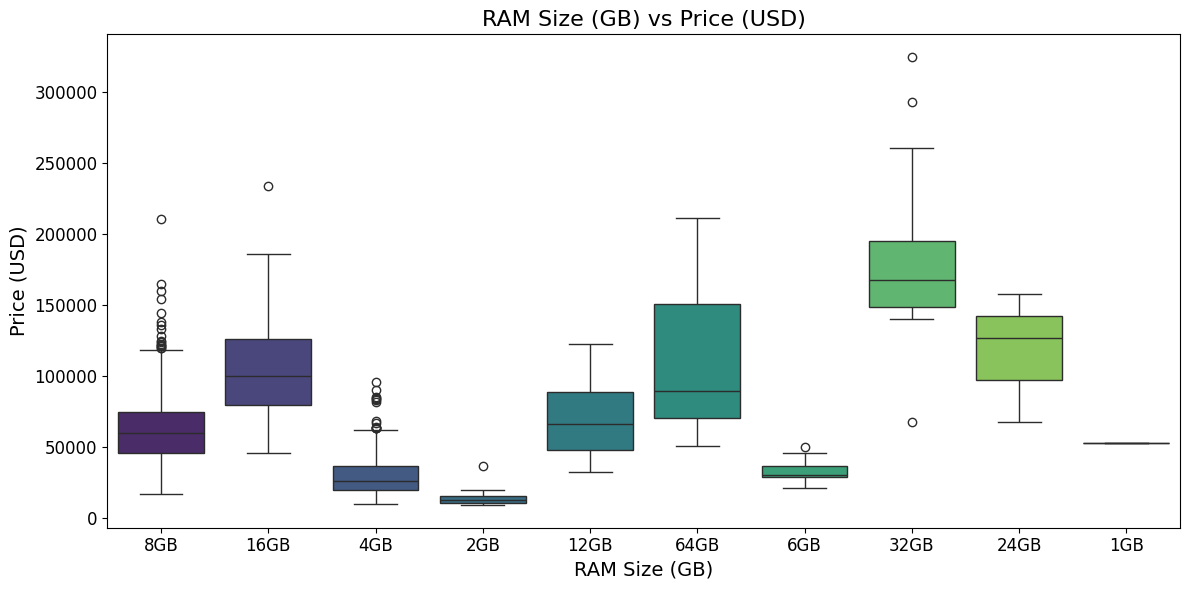

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='RAM Size (GB)', y='Price (USD)', data=dataset, palette='viridis')
plt.title('RAM Size (GB) vs Price (USD)', fontsize=16)
plt.xlabel('RAM Size (GB)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-55-d525a3d1fcbf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Laptop Brand', y='Price (USD)', data=dataset, palette='Set3')


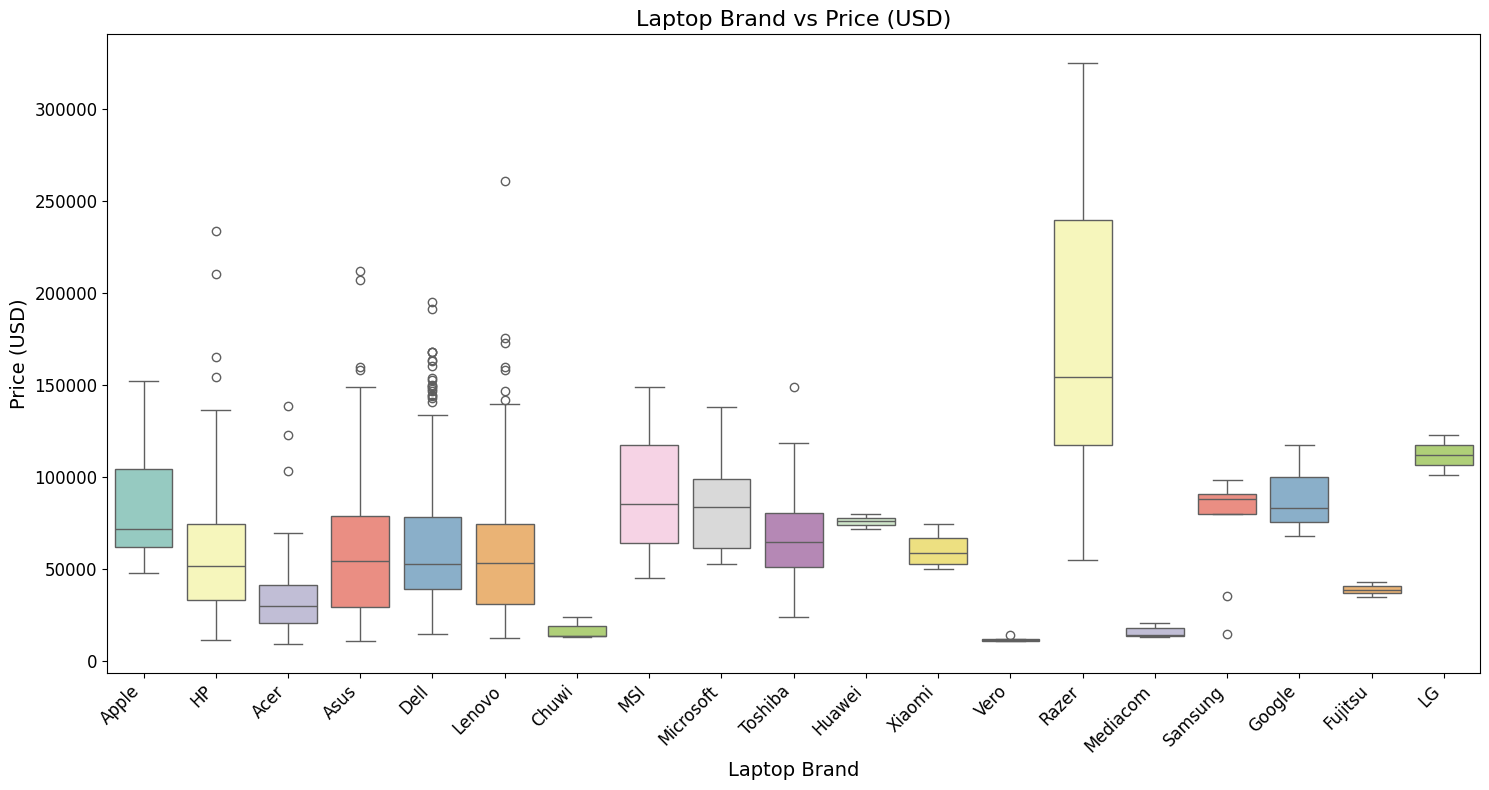

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Laptop Brand', y='Price (USD)', data=dataset, palette='Set3')
plt.title('Laptop Brand vs Price (USD)', fontsize=16)
plt.xlabel('Laptop Brand', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

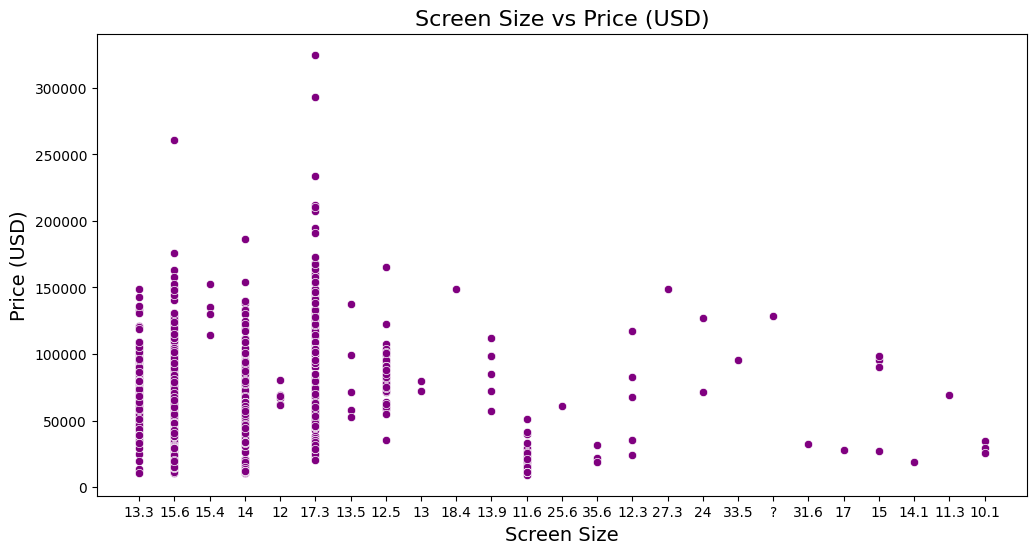

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Screen Size', y='Price (USD)', data=dataset, color = 'purple', marker = 'o')
plt.title('Screen Size vs Price (USD)', fontsize=16)
plt.xlabel('Screen Size', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.show()


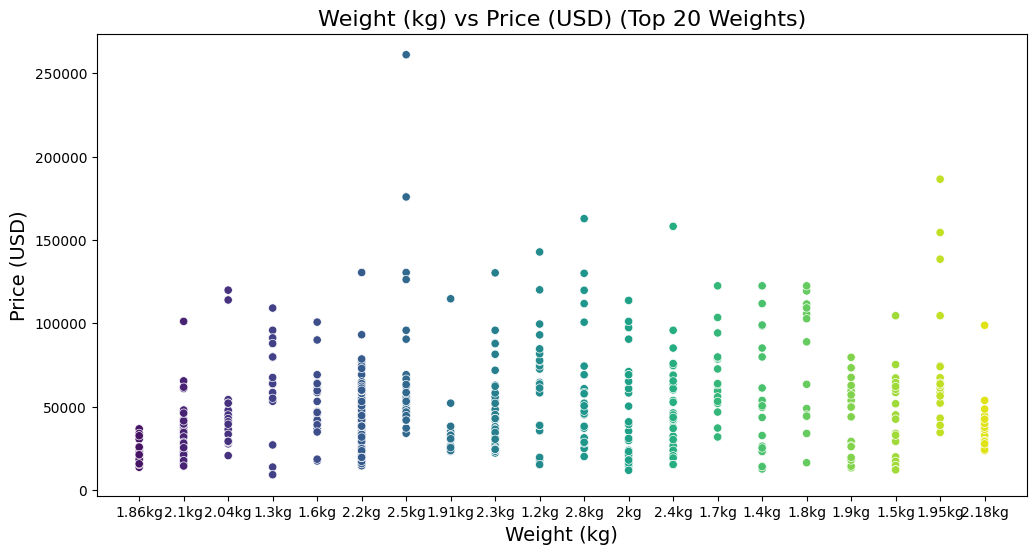

In [ ]:
weight_plot = dataset['Weight (kg)'].value_counts().nlargest(20).index
dataset_top_20 = dataset[dataset['Weight (kg)'].isin(weight_plot)]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Weight (kg)', y='Price (USD)', data=dataset_top_20, hue='Weight (kg)', palette='viridis', legend=False)
plt.title('Weight (kg) vs Price (USD) (Top 20 Weights)', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.show()

<ipython-input-63-c89e7ee17d17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Storage Details', y='Price (USD)', data=dataset, palette='viridis')


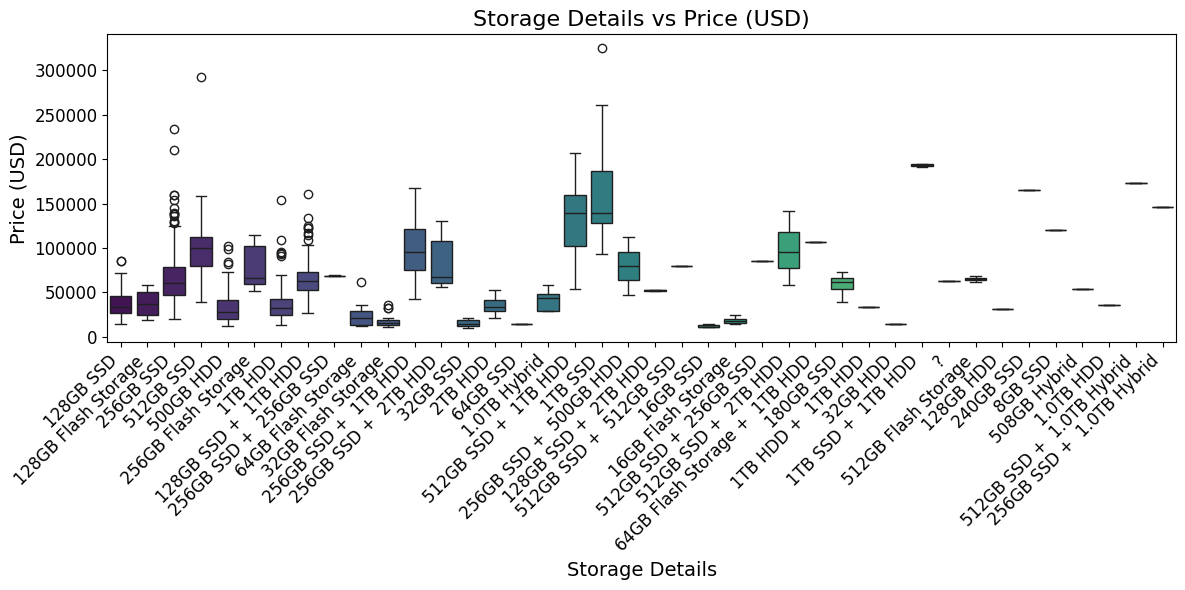

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Storage Details', y='Price (USD)', data=dataset, palette='viridis')
plt.title('Storage Details vs Price (USD)', fontsize=16)
plt.xlabel('Storage Details', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


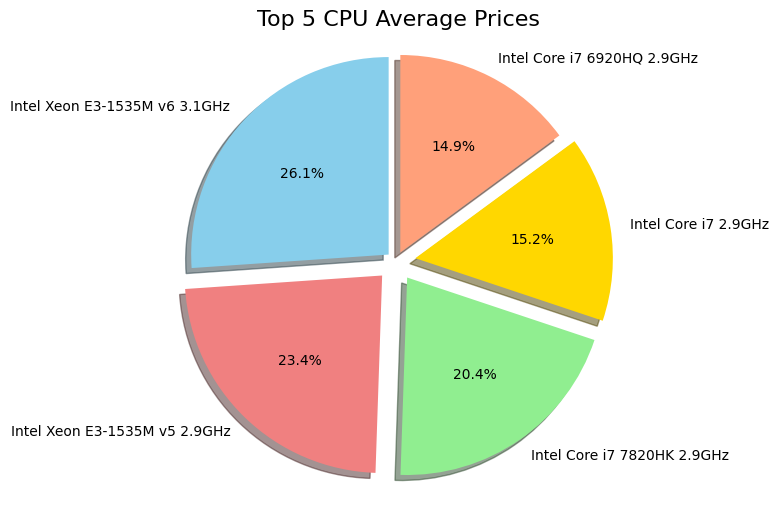

In [ ]:
cpu_price = dataset.groupby('CPU Details')['Price (USD)'].mean()
top_5_cpus = cpu_price.nlargest(5)
plt.figure(figsize=(6, 6))
explode = (0.05, 0.1, 0.1, 0.1, 0.05)
plt.pie(top_5_cpus, labels=top_5_cpus.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon'], explode=explode, shadow=True)
plt.title('Top 5 CPU Average Prices', fontsize=16)
plt.axis('equal')
plt.show()

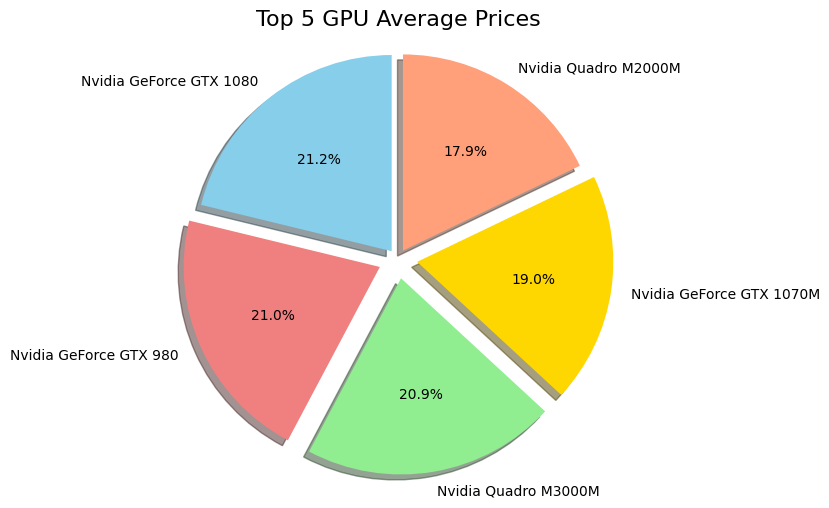

In [ ]:
gpu_price = dataset.groupby('GPU Details')['Price (USD)'].mean()
top_5_gpus = gpu_price.nlargest(5)
plt.figure(figsize=(6, 6))
explode = (0.05, 0.1, 0.1, 0.1, 0.05)
plt.pie(top_5_gpus, labels=top_5_gpus.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon'], explode=explode, shadow=True)
plt.title('Top 5 GPU Average Prices', fontsize=16)
plt.axis('equal')
plt.show()

<ipython-input-74-c54be42d5ffb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price (USD)', data=dataset_no_outliers, palette='viridis')


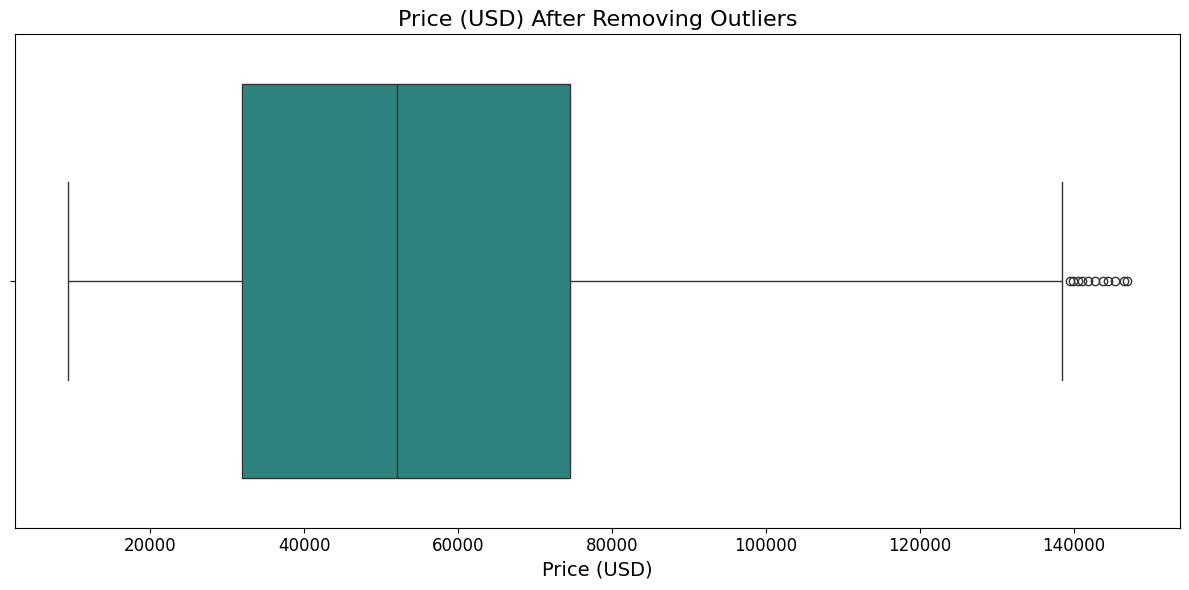

In [ ]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

dataset_no_outliers = remove_outliers_iqr(dataset, 'Price (USD)')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price (USD)', data=dataset_no_outliers, palette='viridis')
plt.title('Price (USD) After Removing Outliers', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# since i only have numeric values in my dataset so it's not possible to implement correlation graph




This analysis of laptop data revealed insights into pricing and factors that influence laptop prices. Laptop prices vary widely, with outliers impacting the perceived range. Brand significantly affects cost, as some brands command higher prices. RAM and screen size show a positive correlation with price, while weight has a moderate impact, with lighter laptops generally being pricier. Storage configurations and specific CPU/GPU models also influence cost. Operating system choice can play a role in price determination. i tried to visualize all the factors affecting price of the laptop. Also cleaned the data by removing null values and duplicate values.